<a href="https://colab.research.google.com/github/AnuhyaTirukatchi/project/blob/main/dataexploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras import layers, models


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_dir = "/content/drive/MyDrive/Colab Notebooks/Covid19-Pneumonia-Normal Chest X-Ray Images Dataset"
folders = os.listdir(base_dir)

file_path = []
labels = []

for folder in folders:
    sub_folder = os.path.join(base_dir, folder)
    sub_list = os.listdir(sub_folder)
    for file in sub_list:
        f_path = os.path.join(sub_folder, file)
        file_path.append(f_path)
        labels.append(folder)

df = pd.DataFrame({'file_path': file_path, 'labels': labels})
df.head()

,file_path,labels
0,/content/drive/MyDrive/Colab Notebooks/Covid19...,COVID
1,/content/drive/MyDrive/Colab Notebooks/Covid19...,COVID
2,/content/drive/MyDrive/Colab Notebooks/Covid19...,COVID
3,/content/drive/MyDrive/Colab Notebooks/Covid19...,COVID
4,/content/drive/MyDrive/Colab Notebooks/Covid19...,COVID


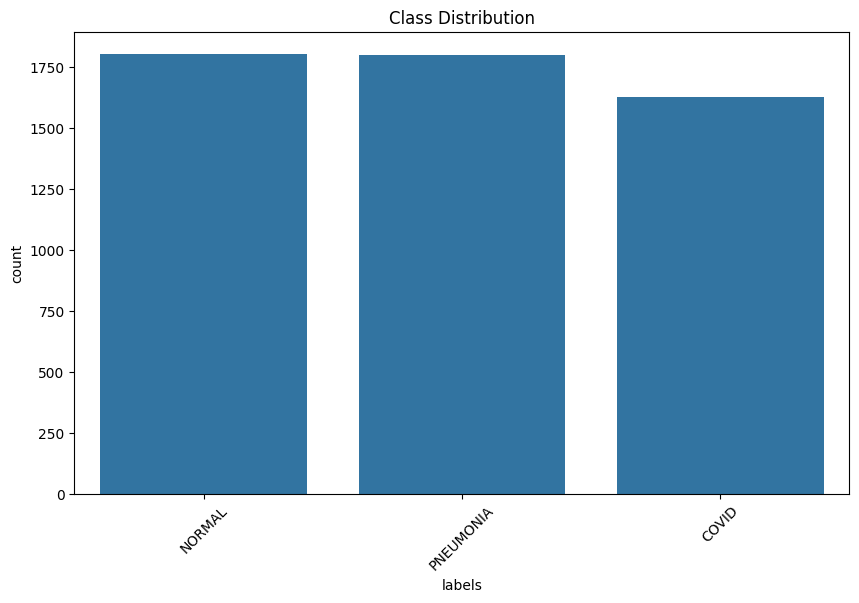

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='labels', order=df['labels'].value_counts().index)
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.show()

             width       height
count  5228.000000  5228.000000
mean    236.590666   236.590666
std       9.440276     9.440276
min     232.000000   232.000000
25%     232.000000   232.000000
50%     232.000000   232.000000
75%     232.000000   232.000000
max     256.000000   256.000000


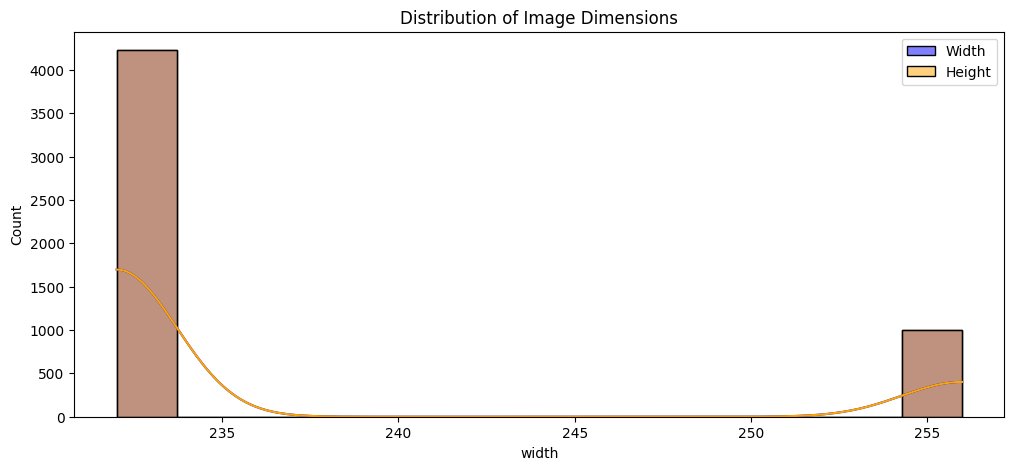

In [ ]:
from PIL import Image

img_dimensions = []
for path in df['file_path']:
    with Image.open(path) as img:
        img_dimensions.append(img.size)

df['dimensions'] = img_dimensions
df['width'] = df['dimensions'].apply(lambda x: x[0])
df['height'] = df['dimensions'].apply(lambda x: x[1])

# Summary statistics
print(df[['width', 'height']].describe())

# Visualize distribution
plt.figure(figsize=(12,5))
sns.histplot(df['width'], color='blue', label='Width', kde=True)
sns.histplot(df['height'], color='orange', label='Height', kde=True)
plt.legend()
plt.title('Distribution of Image Dimensions')
plt.show()


In [ ]:
missing_files = [f for f in df['file_path'] if not os.path.exists(f)]
print(f"Missing files: {len(missing_files)}")

# Attempt to open images to catch corrupted files
corrupt_files = []
for f in df['file_path']:
    try:
        img = Image.open(f)
        img.verify()
    except:
        corrupt_files.append(f)

print(f"Corrupt files: {len(corrupt_files)}")



Missing files: 0
Corrupt files: 0


In [ ]:
color_modes = []

for f in df['file_path']:
    with Image.open(f) as img:
        color_modes.append(img.mode)

df['color_mode'] = color_modes
print(df['color_mode'].value_counts())


color_mode
RGB     5227
RGBA       1
Name: count, dtype: int64


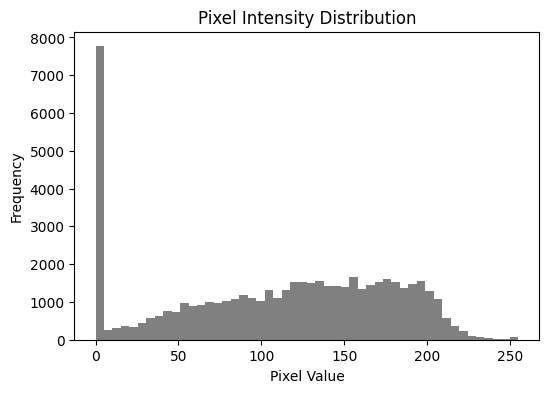

In [ ]:
import numpy as np

sample_path = df.sample(1)['file_path'].values[0]
img = Image.open(sample_path).convert('L')
img_array = np.array(img)

plt.figure(figsize=(6,4))
plt.hist(img_array.flatten(), bins=50, color='gray')
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()


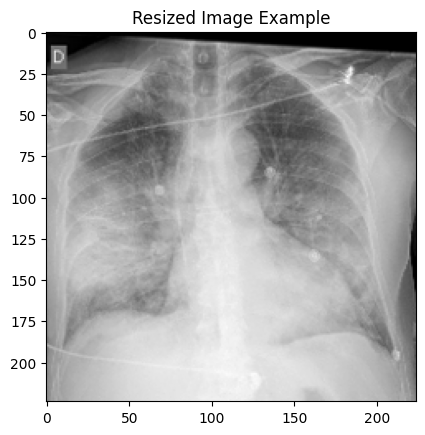

In [ ]:
img_size = (224, 224)

def resize_image(path):
    img = Image.open(path).convert('L')  # Grayscale conversion
    img = img.resize(img_size)
    return np.array(img)

# Example for one image
sample_img = resize_image(df['file_path'].iloc[0])
plt.imshow(sample_img, cmap='gray')
plt.title("Resized Image Example")
plt.show()


In [ ]:
img_normalized = sample_img / 255.0  #  scaling to [0, 1]

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_names = df['labels'].unique()
class_weights = compute_class_weight(class_weight='balanced', classes=class_names, y=df['labels'])

weights = dict(zip(class_names, class_weights))
print(weights)


{'COVID': np.float64(1.071750717507175), 'NORMAL': np.float64(0.9670736219015909), 'PNEUMONIA': np.float64(0.9681481481481482)}
